In [4]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.datasets import load_boston

In [7]:
# load data
data = load_boston()

In [8]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)[['RM', 'LSTAT', 'CRIM']]

In [11]:
df

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


# TRIM

In [17]:
def diagnostic_plots(df, variable):
    fig, ax = plt.subplots(figsize=(15, 5))
    
    # histogram 
    plt.subplot(1, 3, 1)
    plt.hist(df[variable], bins=30)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('Quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

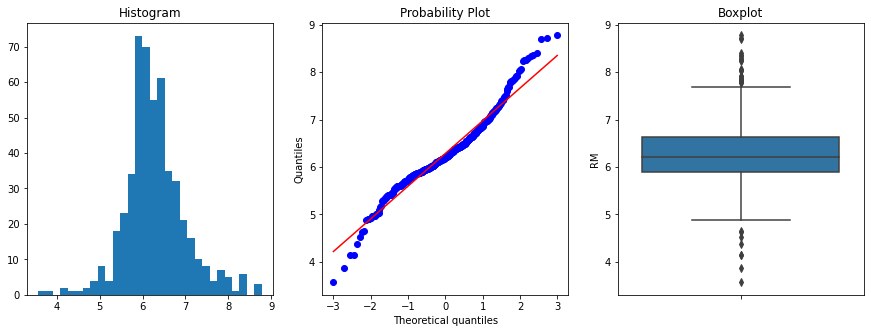

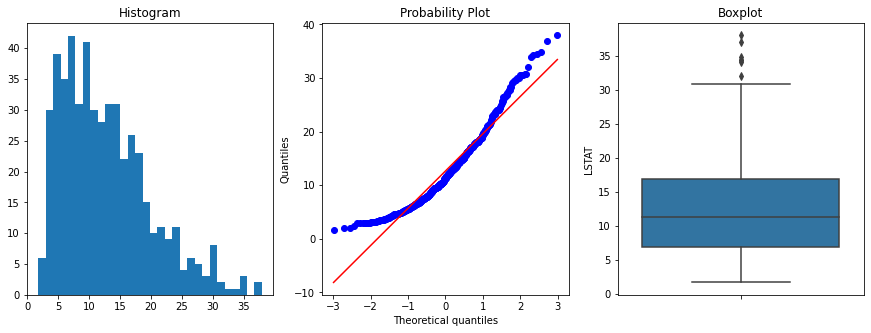

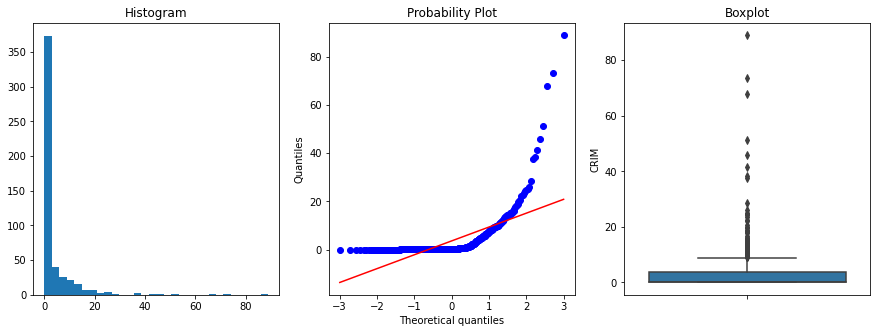

In [18]:
for variable in df.columns:
    diagnostic_plots(df, variable)

In [19]:
# Find upper and lower boundary 
def find_skewed_boundaries(df, variable, distance):
    # distance is normally 1.5 or 3
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
  
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
  
    return upper_boundary, lower_boundary

In [25]:
boundary = {}
for variable in df.columns:
    upper_boundary, lower_boundary = find_skewed_boundaries(df, variable, distance=1.5)
    boundary[variable] = {'upper_boundary': upper_boundary, 'lower_boundary': lower_boundary}


In [26]:
boundary

{'RM': {'upper_boundary': 7.730499999999999,
  'lower_boundary': 4.778500000000001},
 'LSTAT': {'upper_boundary': 31.962500000000006,
  'lower_boundary': -8.057500000000005},
 'CRIM': {'upper_boundary': 9.06963875, 'lower_boundary': -5.31051125}}

In [ ]:
# Flat outliers 

# Remove outliers

# Cencoring or capping